In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv('voice-classification.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
data.shape

(3168, 21)

In [4]:
data.size

66528

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
features=data.drop('label',axis=1)

In [8]:
features

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std=StandardScaler()

In [11]:
new_features=std.fit_transform(features)
new_features

array([[-4.04924806,  0.42735532, -4.22490078, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105326,  0.61166951, -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306646,  1.60384791, -4.09585051, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877325,  2.32272353, -0.05197278, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772848, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087874, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [12]:
target=data[['label']]

In [13]:
target

,label
0,male
1,male
2,male
3,male
4,male
...,...
3163,female
3164,female
3165,female
3166,female


In [14]:
x_train,x_test,y_train,y_test=train_test_split(new_features,target,train_size=0.75,random_state=100)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 20)
(792, 20)
(2376, 1)
(792, 1)


In [16]:
svc=SVC(C=1.0,kernel='rbf')

In [17]:
svc.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [18]:
y_pred=svc.predict(x_test)

In [19]:
y_pred

array(['male', 'male', 'male', 'female', 'female', 'female', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'female', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'female', 'female', 'male', 'female', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'fema

In [20]:
accuracy_score(y_test,y_pred)

0.9772727272727273

# using grid

In [ ]:
params={'C':[1,2,3,4,5,6,7,8,9],'kernel':['rbf','linear','poly','sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [ ]:
grid=GridSearchCV(svc,params)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_params

# PCA-(Principle component analysis)

In [21]:
from sklearn.datasets import load_digits

In [22]:
data=load_digits()

In [23]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [24]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [25]:
features=pd.DataFrame(data.data,columns=data.feature_names)

In [26]:
features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


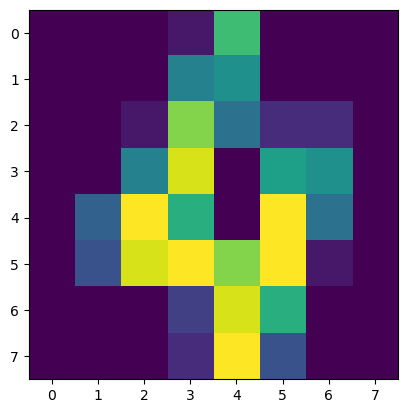

In [27]:
img=features.loc[4].values.reshape(8,8)
plt.imshow(img)

In [28]:
target=pd.DataFrame(data.target,columns= ['Target'])

In [29]:
target

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [30]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347, 1)
(450, 1)


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca=PCA(n_components=10)

In [34]:
pca.fit(x_train)
pca.fit(x_test)

PCA(n_components=10)

In [35]:
new_x_train=pca.transform(x_train)
new_x_test=pca.transform(x_test)

In [36]:
print(new_x_train.shape)
print(new_x_test.shape)

(1347, 10)
(450, 10)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LR=LogisticRegression()

In [39]:
LR.fit(new_x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred=LR.predict(new_x_test)

In [41]:
y_pred

array([9, 1, 0, 2, 4, 5, 7, 4, 7, 2, 4, 5, 7, 5, 9, 6, 1, 1, 5, 2, 8, 7,
       6, 6, 6, 7, 0, 2, 8, 3, 0, 9, 3, 9, 5, 5, 3, 6, 3, 6, 1, 1, 5, 2,
       0, 4, 8, 3, 7, 4, 1, 5, 5, 1, 4, 8, 5, 7, 3, 9, 6, 3, 5, 1, 2, 6,
       3, 6, 6, 6, 8, 4, 6, 0, 6, 6, 2, 1, 6, 3, 5, 3, 3, 1, 1, 4, 0, 5,
       5, 4, 1, 7, 0, 0, 8, 4, 4, 2, 7, 5, 4, 0, 9, 3, 4, 5, 7, 2, 5, 5,
       5, 2, 1, 3, 2, 0, 1, 9, 7, 3, 2, 1, 9, 6, 6, 7, 0, 7, 5, 0, 7, 6,
       0, 2, 8, 2, 0, 7, 6, 3, 4, 5, 0, 3, 9, 0, 1, 0, 3, 6, 8, 1, 4, 1,
       8, 9, 0, 0, 6, 2, 2, 7, 5, 9, 2, 4, 1, 5, 3, 4, 2, 0, 6, 9, 3, 1,
       0, 0, 7, 4, 4, 4, 3, 9, 5, 3, 4, 3, 2, 8, 2, 4, 9, 7, 2, 7, 1, 0,
       1, 3, 8, 6, 1, 9, 0, 3, 1, 5, 3, 8, 0, 6, 8, 6, 2, 9, 9, 2, 6, 2,
       1, 4, 4, 2, 8, 0, 7, 8, 7, 2, 6, 4, 0, 9, 0, 5, 0, 3, 3, 9, 0, 2,
       7, 0, 1, 2, 2, 7, 3, 2, 0, 2, 2, 5, 1, 2, 6, 7, 0, 5, 9, 3, 5, 2,
       2, 6, 4, 7, 9, 4, 0, 9, 0, 8, 7, 0, 9, 1, 0, 7, 1, 6, 0, 5, 9, 9,
       6, 8, 7, 4, 2, 8, 1, 0, 8, 1, 9, 6, 1, 8, 7,

In [42]:
accuracy_score(y_test,y_pred)

0.9511111111111111

In [43]:
pca.explained_variance_ratio_

array([0.15632758, 0.15039126, 0.1133261 , 0.07570252, 0.05961894,
       0.04960901, 0.04373182, 0.03704573, 0.03426341, 0.02847265])

# Regularization

In [44]:
df=pd.read_csv('Advertising.csv')

In [45]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [46]:
df=pd.read_csv('Advertising.csv',index_col=0)

In [47]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [48]:
features=df.drop('sales',axis=1)
target=df[['sales']]

In [49]:
features

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [58]:
target

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [59]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [60]:
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 1)
(150, 1)
(50, 1)


In [61]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [78]:
lasso=Lasso(alpha=10)

In [79]:
lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [80]:
y_pred=lasso.predict(x_test)

In [81]:
y_pred

array([ 9.96214787, 19.59602497, 16.07102306, 18.56191519, 20.29393736,
       13.9337817 , 12.24111536, 13.27349757, 19.70348785, 20.04325998,
       11.31547333, 18.91421575,  7.26987674, 15.41012236,  9.54913568,
        8.85275207, 15.82719698, 12.67688998, 16.62010699, 11.5181461 ,
       17.03778217, 10.54446324, 19.64190698, 16.72657848, 15.26576065,
       20.94600397, 18.65585825, 10.26041207, 18.61622024, 14.49094334,
       13.49240239,  8.36919184, 10.56372337, 14.9980384 ,  7.8557399 ,
       13.48215239,  8.48950828, 12.49395156, 14.36828949, 15.25665786,
       17.01057321, 14.03487423, 14.33854014, 14.48644038, 12.16658827,
        9.38298692, 11.07151418, 19.01679411,  9.42103297,  6.172034  ])

In [82]:
lasso.intercept_

array([3.92182446])

In [83]:
lasso.coef_

array([0.04473479, 0.14630828, 0.        ])

In [84]:
lasso.score(x_test,y_test)

0.8959395754239059

In [85]:
import seaborn as sns

<Axes: xlabel='sales'>

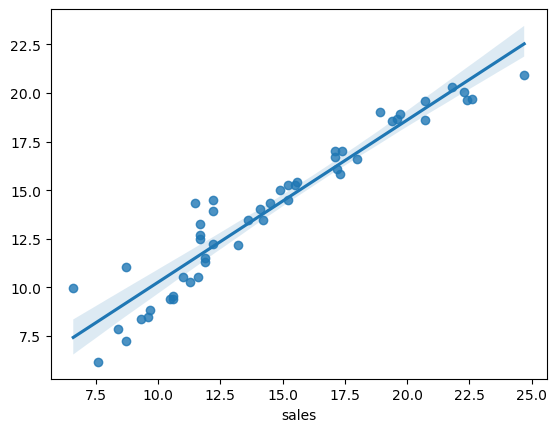

In [86]:
sns.regplot(data=df,x=y_test,y=y_pred)

In [87]:
ridge=Ridge(alpha=5)

In [88]:
ridge.fit(x_train,y_train)

Ridge(alpha=5)

In [89]:
y_pred=ridge.predict(x_test)

In [90]:
y_pred

array([[10.56332732],
       [20.01193361],
       [16.88876406],
       [19.17959372],
       [20.95216796],
       [13.17490171],
       [11.82562933],
       [12.37096555],
       [20.56928088],
       [20.94220526],
       [10.79969509],
       [19.56536907],
       [ 6.43612447],
       [15.24801513],
       [ 8.98107677],
       [ 7.91969618],
       [16.21560404],
       [12.06608272],
       [17.07836193],
       [11.26815279],
       [16.99614033],
       [ 9.78856196],
       [20.80044079],
       [17.20472449],
       [15.1560067 ],
       [21.9467841 ],
       [19.20961063],
       [10.06612782],
       [19.3635741 ],
       [14.84254656],
       [14.31373677],
       [ 7.56097917],
       [ 9.99471622],
       [14.78798468],
       [ 7.20806794],
       [13.58583378],
       [ 7.52167135],
       [11.74600706],
       [13.51955514],
       [15.25393653],
       [17.20722903],
       [13.59015839],
       [14.32554001],
       [13.78506942],
       [11.8871075 ],
       [ 8

In [91]:
ridge.coef_

array([[0.04569463, 0.18794196, 0.00474402]])

In [92]:
ridge.intercept_

array([2.6559197])

In [95]:
ridge.score(x_test,y_test)

0.9018573327879406

<Axes: xlabel='sales'>

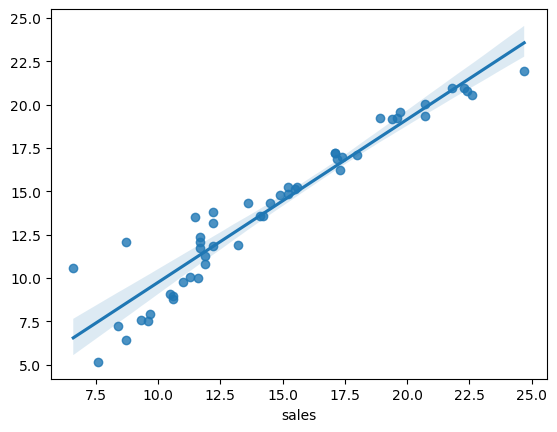

In [96]:
sns.regplot(data=df,x=y_test,y=y_pred)

In [97]:
elasticnet=ElasticNet(alpha=3)

In [98]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=3)

In [99]:
y_pred=elasticnet.predict(x_test)

In [100]:
y_pred

array([10.44995831, 19.95077535, 16.7428048 , 19.06617856, 20.84364557,
       13.31123869, 11.89899719, 12.53610509, 20.41911826, 20.79023465,
       10.89615925, 19.44169836,  6.57823402, 15.28398282,  9.07933261,
        8.08672864, 16.15667581, 12.17094207, 17.00729651, 11.3081852 ,
       17.01374688,  9.91863115, 20.59502497, 17.12072416, 15.17892927,
       21.78488383, 19.11165778, 10.09749046, 19.24496458, 14.78726544,
       14.16866651,  7.70807845, 10.08683583, 14.82717488,  7.32145932,
       13.57270562,  7.6878908 , 11.88153805, 13.67378718, 15.24484704,
       17.16685607, 13.67682037, 14.32324018, 13.90926672, 11.94091708,
        8.88516518, 11.87222817, 19.19575421,  9.13609571,  5.33932486])

In [101]:
elasticnet.intercept_

array([2.88050193])

In [102]:
elasticnet.coef_

array([0.04555492, 0.18075671, 0.00361051])

In [105]:
elasticnet.score(x_test,y_test)

0.9040662527809952

In [106]:
value=range(0,100)

In [110]:
params=dict(alpha=value)

In [111]:
grid=GridSearchCV(elasticnet,params)

In [112]:
grid.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+02, tolerance: 3.931e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

GridSearchCV(estimator=ElasticNet(alpha=3), param_grid={'alpha': range(0, 100)})

In [113]:
grid.best_params_

{'alpha': 0}